## NDT X-Ray Image Segmentation

In [ ]:
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt

from skimage.filters import difference_of_gaussians, window

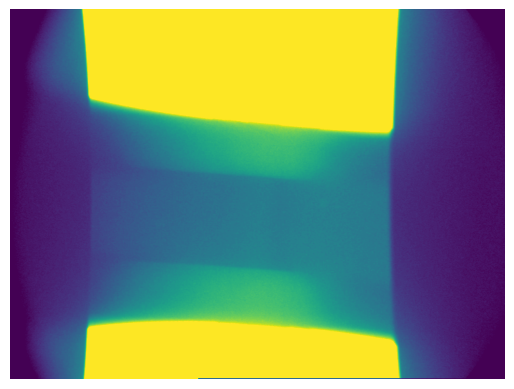

In [2]:
filepath=r'casting-x-rays/C0057_0008.png'

plt.axis("off")
img = plt.imread(filepath)

plt.imshow(img)

In [59]:
print(np.shape(img))
img.dtype

(574, 768)


dtype('float32')

## Rotate the image

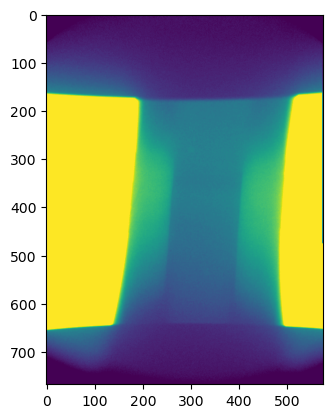

In [38]:
img=np.rot90(img,1)
plt.imshow(img)

## adaptive thresholding

(array([ 22052.,   9909.,  16073.,  25421.,  17069.,  14492.,  13025.,
         12448.,   6197.,   5917.,   6074.,   8809.,   5391.,   5434.,
          7689.,   5552.,   5301.,   5512.,   9728.,   7696.,  10705.,
         15454.,  19238.,   5795.,   3992.,   5094.,   3000.,   2909.,
          2943.,   4673.,   3319.,   3611.,   3730.,   5895.,   3958.,
          3362.,   3150.,   1518.,   1191.,    998.,   1282.,    663.,
           602.,    490.,    684.,    357.,    373.,    474.,    279.,
           284.,    277., 120743.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

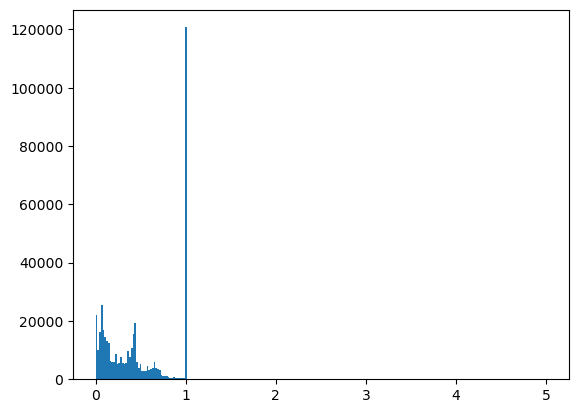

In [61]:
#img_wt = np.dot(img[...,:3],[1/3,1/3,1/3])
#img_wt = np.dot(img[...,:3],[0.299,0.587,0.114])
#img = cv2.convertScaleAbs(img)
plt.hist(img.ravel(),256,[0,5])

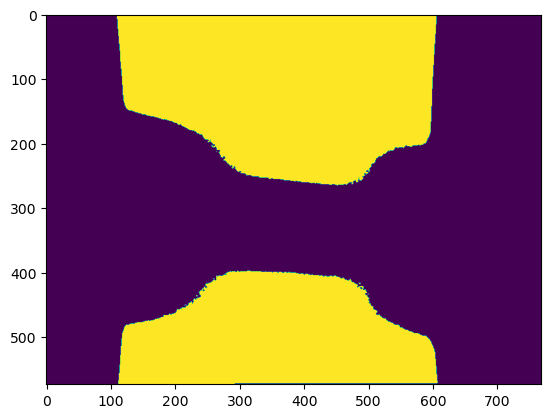

In [46]:
plt.imshow(img)

In [ ]:
threshold=0.5

img0 = plt.imread(filepath,0)
#img0 = cv2.convertScaleAbs(img0)

img = cv2.medianBlur(img0,3)
ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,33,2)



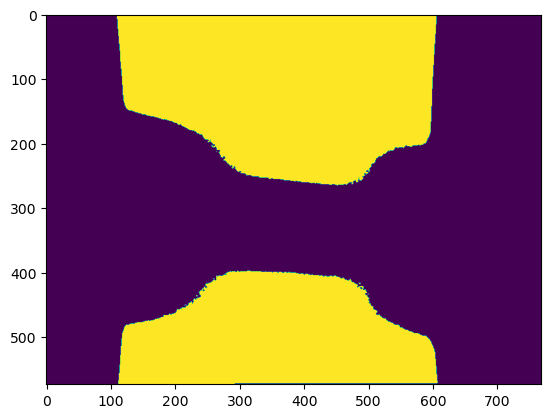

In [64]:
plt.imshow(img)

## Sobel Filter

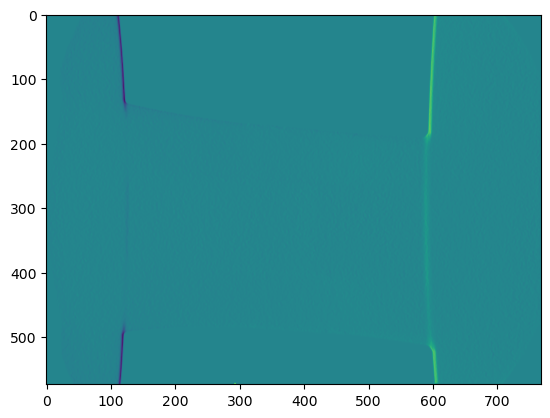

In [69]:
#horizontal Sobel filter
kernel = np.matrix(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]
    ]
)

vr_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(vr_edges)

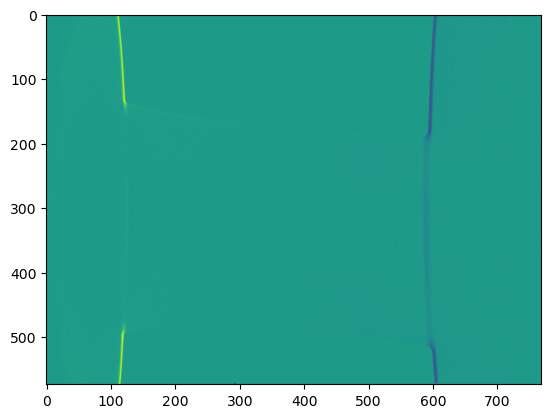

In [68]:
#vertical face left Sobel filter
kernel = np.matrix(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]
    ]
)

vl_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(vl_edges)

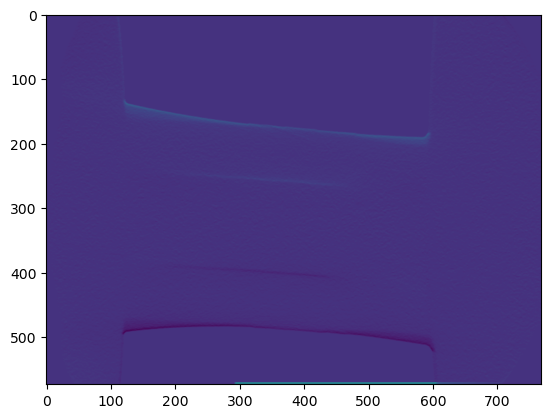

In [70]:
#horizontal face down Sobel filter
kernel = np.matrix(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]
    ]
)

hd_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(hd_edges)

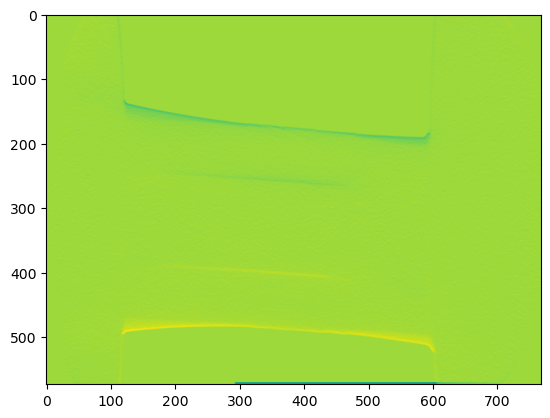

In [71]:
#horizontal face up Sobel filter
kernel = np.matrix(
    [[-1, -2,-1],
     [0, 0, 0],
     [1, 2, 1]
    ]
)

hu_edges=cv2.filter2D(src=img, ddepth=-1,kernel=kernel)
plt.imshow(hu_edges)

## Add images

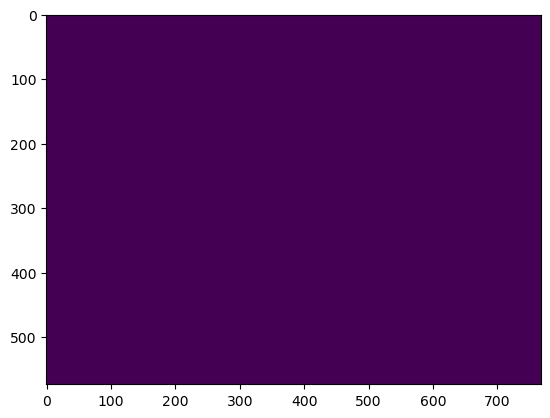

In [80]:
h_edges=cv2.add(hu_edges,hd_edges)
v_edges=cv2.add(vr_edges,vl_edges)
all_edges = cv2.add(h_edges,v_edges)

plt.imshow(v_edges)

# Stitching images

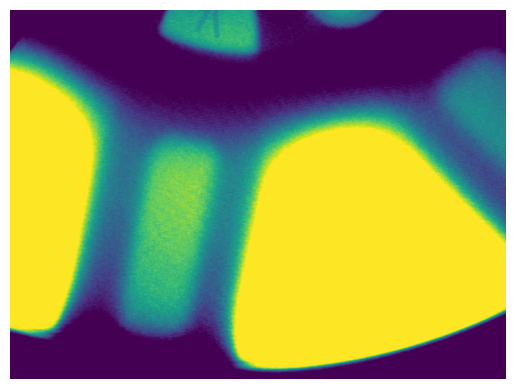

In [85]:
filepath2 = r'casting-x-rays/C0042_0002.png'

plt.axis("off")
img2 = plt.imread(filepath2)
plt.imshow(img)
plt.imshow(img2)

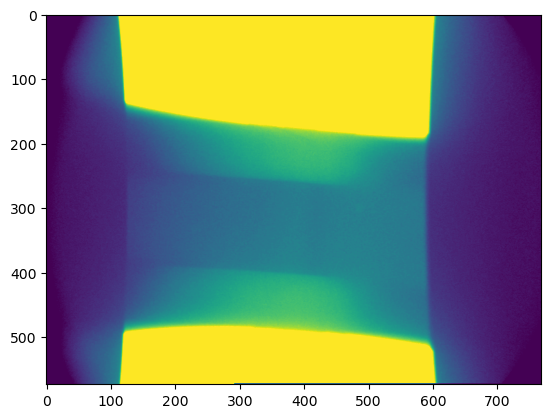

In [86]:
plt.imshow(img)

In [87]:
#split image

imgL=img[:,:150]
imgR=img[:,675:]

print(np.shape(imgL))
print(np.shape(imgR))

(574, 150)
(574, 93)


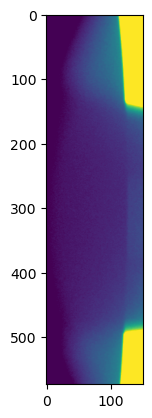

In [88]:
plt.imshow(imgL)

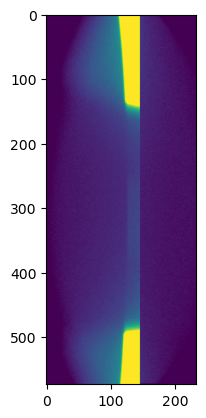

In [91]:
overlap = 10

heightL, widthL = imgL.shape
heightR, widthR = imgR.shape

stitch = np.concatenate((imgL[:,:widthL-int(overlap/2)], imgR[:,int(overlap/2):]), axis=1)
plt.imshow(stitch)

## Erosion and Dilation

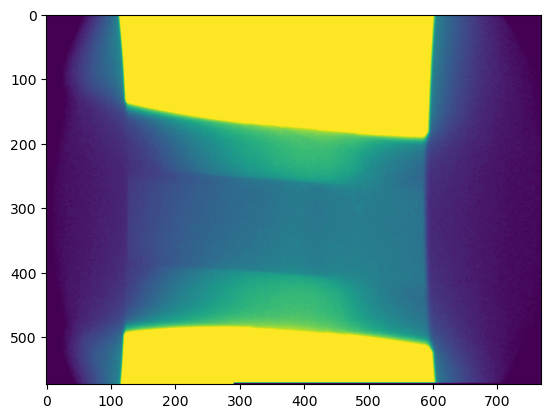

In [99]:
kernel3 = np.ones((3,3), np.uint8)
img2=cv2.erode(img,kernel3,iterations=1)
plt.imshow(img2)

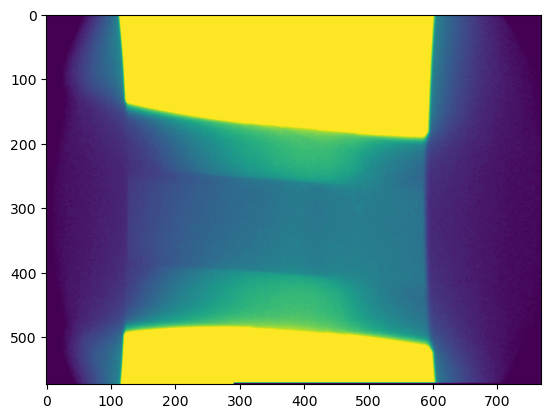

In [100]:
kernel5 = np.ones((5,5), np.uint8)
img3=cv2.dilate(img,kernel5,iterations=1)
plt.imshow(img2)

## Simple thresholding

In [14]:

img_bw = plt.imread(filepath,0)

height, width=img_bw.shape

binary = np.zeros([height,width,1],'uint8')

thresh=.3

for row in range(0,height):
    for col in range(0,width):
        if img_bw[row][col] > thresh:
            binary[row][col] = 255
    

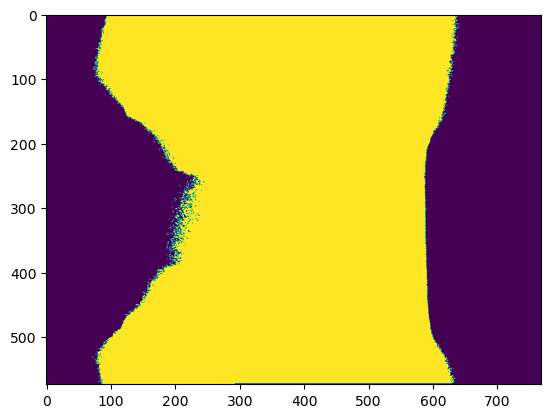

In [20]:

plt.imshow(binary)

## Adaptive thresholding

In [ ]:
thres_adapt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 1,1 )
plt.imshow(thres_adapt)

## Contours

In [ ]:
#gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115,1 )

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2,CHAIN_APPROX_SIMPLE)